In [2]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

### Load images

Three images of PH with varying signal intensity

In [4]:
path1 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161900xfp_tom4,15,60/05'
path2 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161900xfp_tom4,15,60/08'
path3 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161000xfp_tom4,15,60/04'
path_n2 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/N2/211117_n2_wt_tom4,15,60/10'

img1 = load_image(path1 + '/af_corrected.tif')
img2 = load_image(path2 + '/af_corrected.tif')
img3 = load_image(path3 + '/af_corrected.tif')
img_n2 = load_image(path_n2 + '/af_corrected.tif')

roi1 = np.loadtxt(path1 + '/ROI.txt')
roi2 = np.loadtxt(path2 + '/ROI.txt')
roi3 = np.loadtxt(path3 + '/ROI.txt')
roi_n2 = np.loadtxt(path_n2 + '/ROI.txt')

### Create synthetic noisy images

Adding Gaussian noise to pixel values. Testing a few levels of pixel noise

<IPython.core.display.Javascript object>


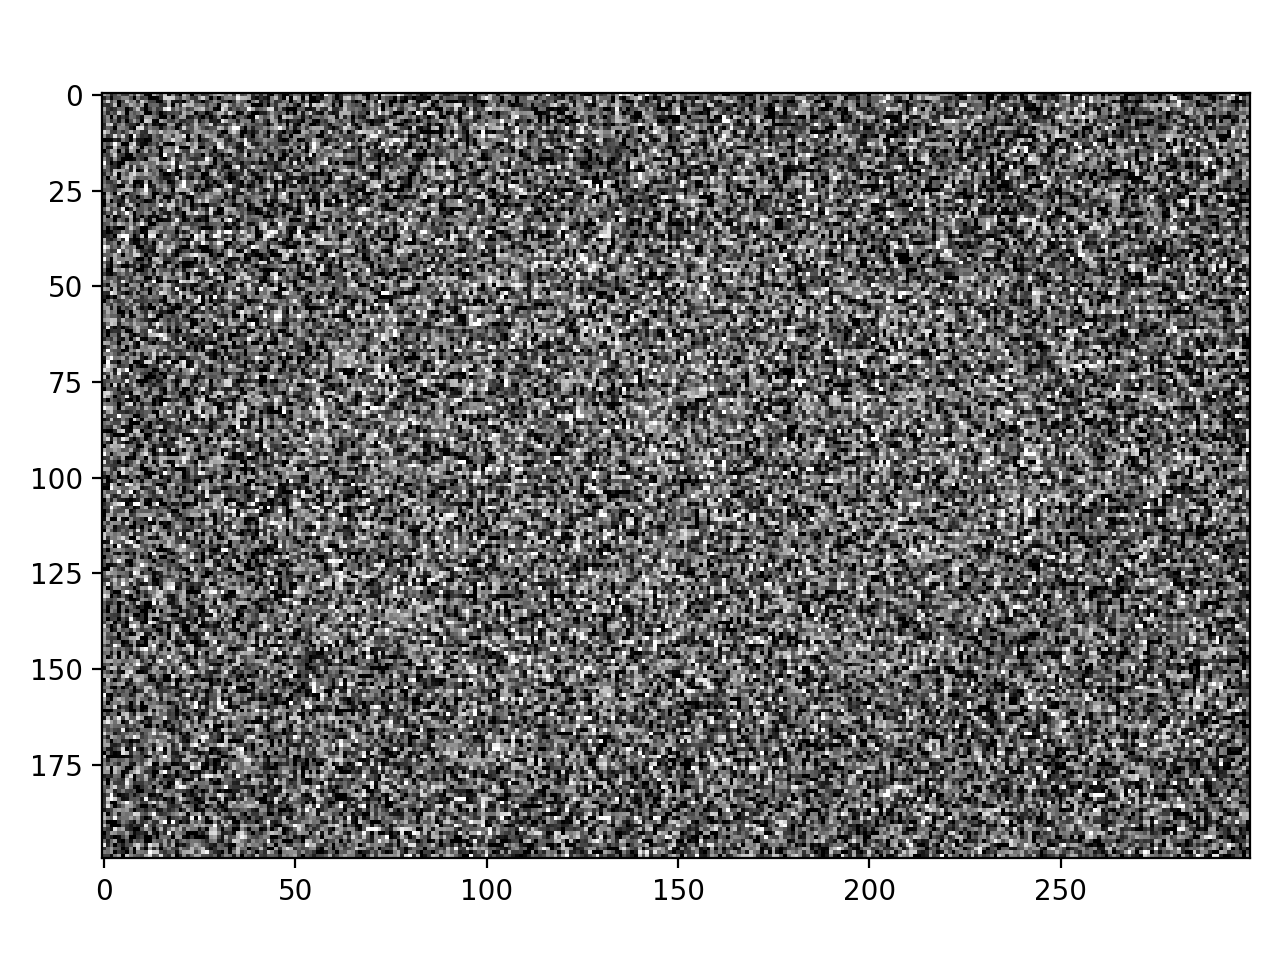

interactive(children=(IntSlider(value=0, description='noise', max=5000, step=1000), Output()), _dom_classes=('…

In [5]:
def fig_noisy_images():
    fig, ax = plt.subplots()
    @widgets.interact(noise=(0, 5000, 1000))
    def update(noise=0):
        noisy = img3 + np.random.normal(0, noise, img3.shape)
        noisy_rotated = rotated_embryo(noisy, roi3, 300, 200, 3)
        ax.clear()
        ax.imshow(noisy_rotated, cmap='gray', vmin=-5000, vmax=10000)
#     fig.set_size_inches(5, 5)
    fig.tight_layout()
    
fig_noisy_images()

In [6]:
n = 10
noises = np.repeat(np.linspace(0, 5000, 11), n)

images1 = []
for noise in noises:
    images1.append(img1 + np.random.normal(0, noise, img1.shape))
    
images2 = []
for noise in noises:
    images2.append(img2 + np.random.normal(0, noise, img2.shape))
    
images3 = []
for noise in noises:
    images3.append(img3 + np.random.normal(0, noise, img3.shape))
    
images_n2 = []
for noise in noises:
    images_n2.append(img_n2 + np.random.normal(0, noise, img_n2.shape))

### Run quantification

In [22]:
cytbg = np.loadtxt('../T2A/cytbg.txt')
membg = np.loadtxt('../PAR2 RING MUTANTS/mem_profile.txt')

iq1 = ImageQuant(images1, roi=roi1, thickness=50, periodic=True, rol_ave=5, iterations=2, lr=0.01, descent_steps=350, 
                uni_cyt=True, uni_mem=False, nfits=100, cytbg=cytbg, membg=membg, interp_type='linear',
                roi_knots=20)

iq2 = ImageQuant(images2, roi=roi2, thickness=50, periodic=True, rol_ave=5, iterations=2, lr=0.01, descent_steps=350, 
                uni_cyt=True, uni_mem=False, nfits=100, cytbg=cytbg, membg=membg, interp_type='linear',
                roi_knots=20)

iq3 = ImageQuant(images3, roi=roi3, thickness=50, periodic=True, rol_ave=5, iterations=2, lr=0.01, descent_steps=350, 
                uni_cyt=True, uni_mem=False, nfits=100, cytbg=cytbg, membg=membg, interp_type='linear',
                roi_knots=20)

In [23]:
iq_n2 = ImageQuant(images_n2, roi=roi_n2, thickness=50, periodic=True, rol_ave=5, iterations=2, lr=0.01, 
                   descent_steps=350, uni_cyt=True, uni_mem=False, nfits=100, cytbg=cytbg, membg=membg, 
                   interp_type='linear', roi_knots=20)

In [24]:
iq1.run()
iq2.run()
iq3.run()

100%|██████████| 350/350 [01:34<00:00,  3.71it/s]


Time elapsed: 192.77 seconds 


100%|██████████| 350/350 [01:33<00:00,  3.73it/s]


Time elapsed: 192.99 seconds 


100%|██████████| 350/350 [01:37<00:00,  3.58it/s]


Time elapsed: 197.03 seconds 


<IPython.core.display.Javascript object>


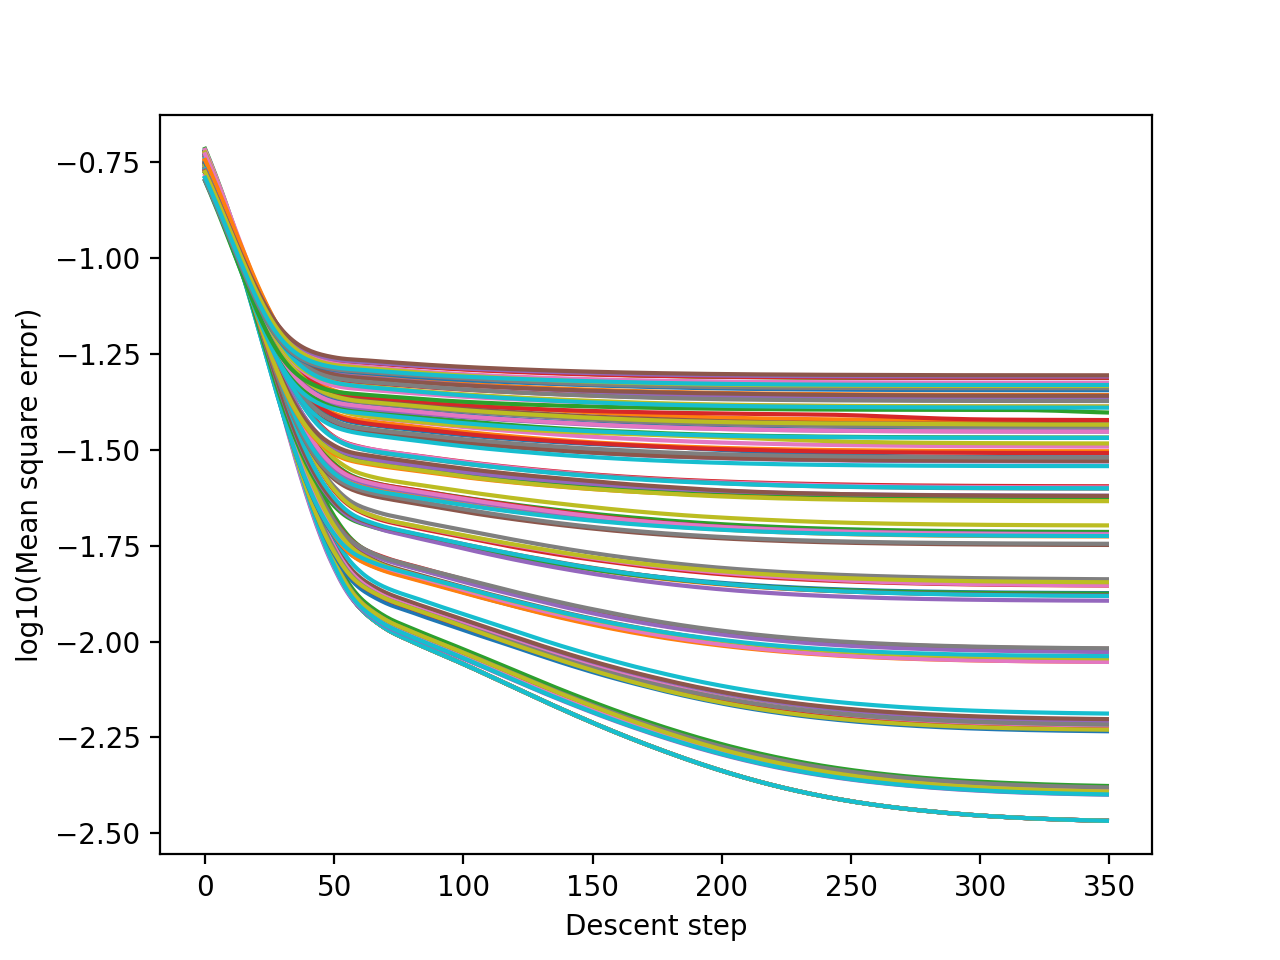

<IPython.core.display.Javascript object>


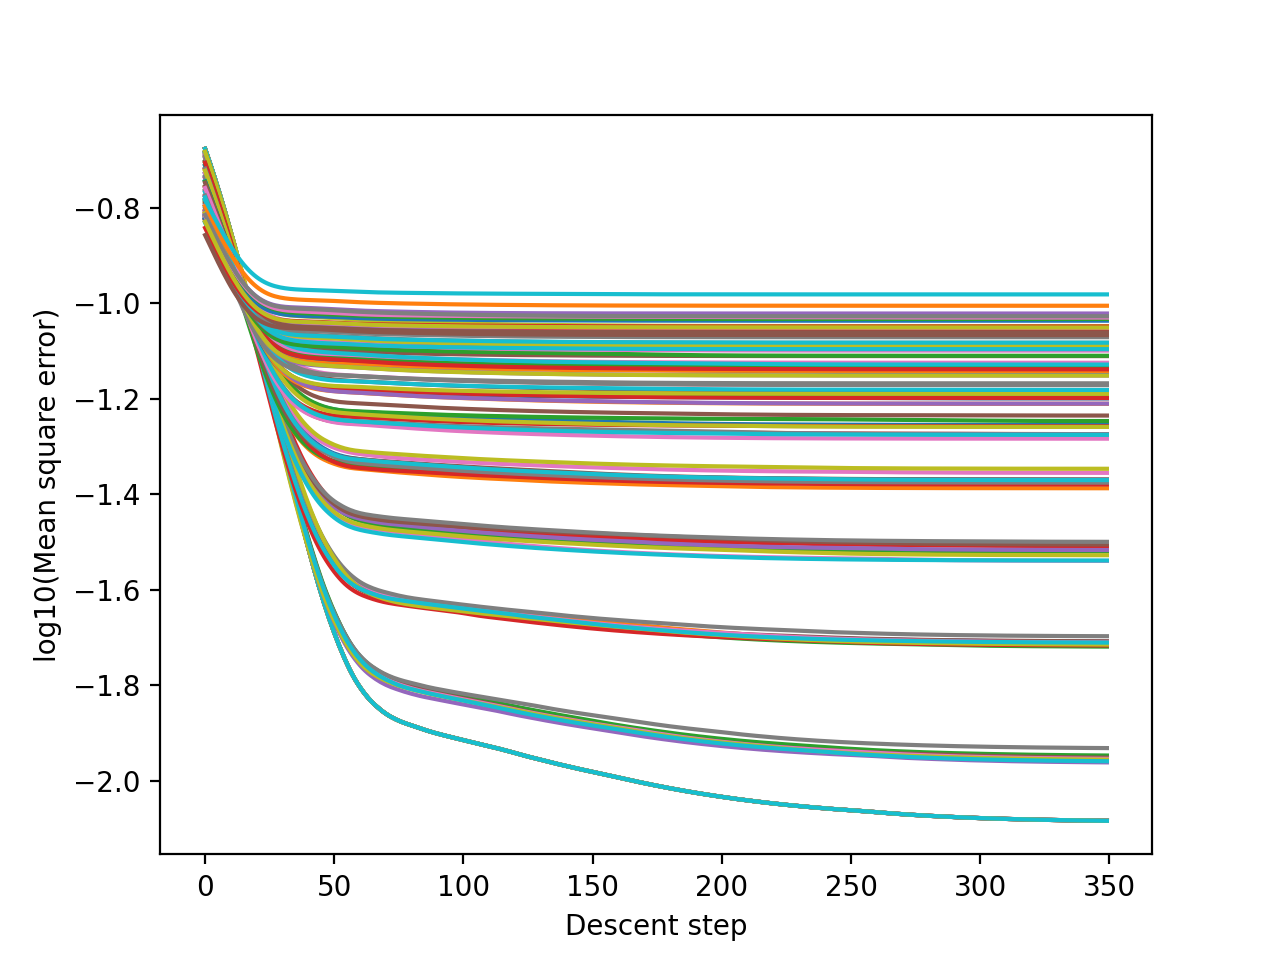

<IPython.core.display.Javascript object>


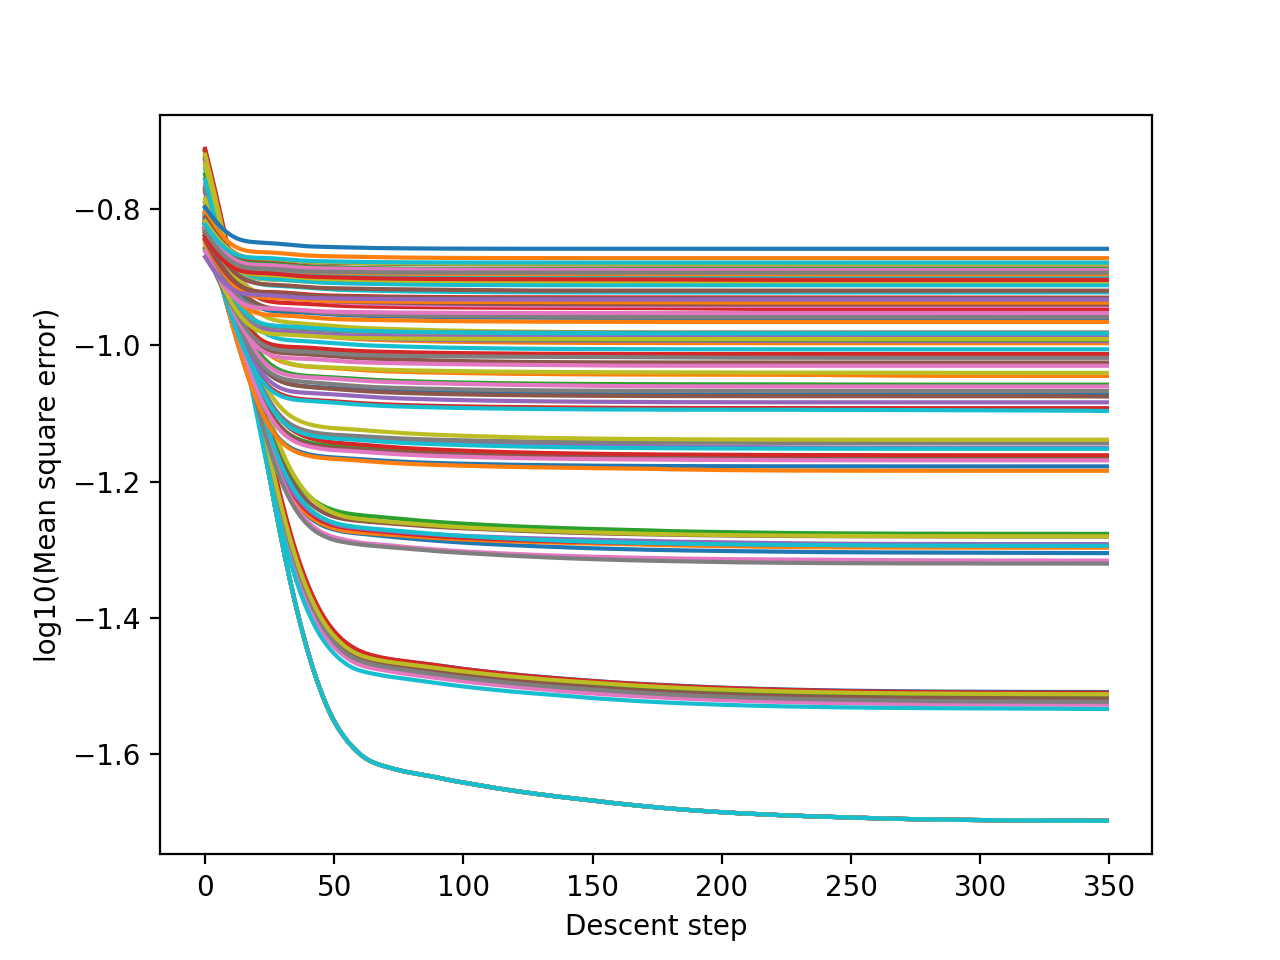

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [27]:
iq1.plot_losses(log=True)
iq2.plot_losses(log=True)
iq3.plot_losses(log=True)

In [29]:
iq_n2.run()

100%|██████████| 200/200 [00:56<00:00,  3.54it/s]


Time elapsed: 115.77 seconds 


<IPython.core.display.Javascript object>


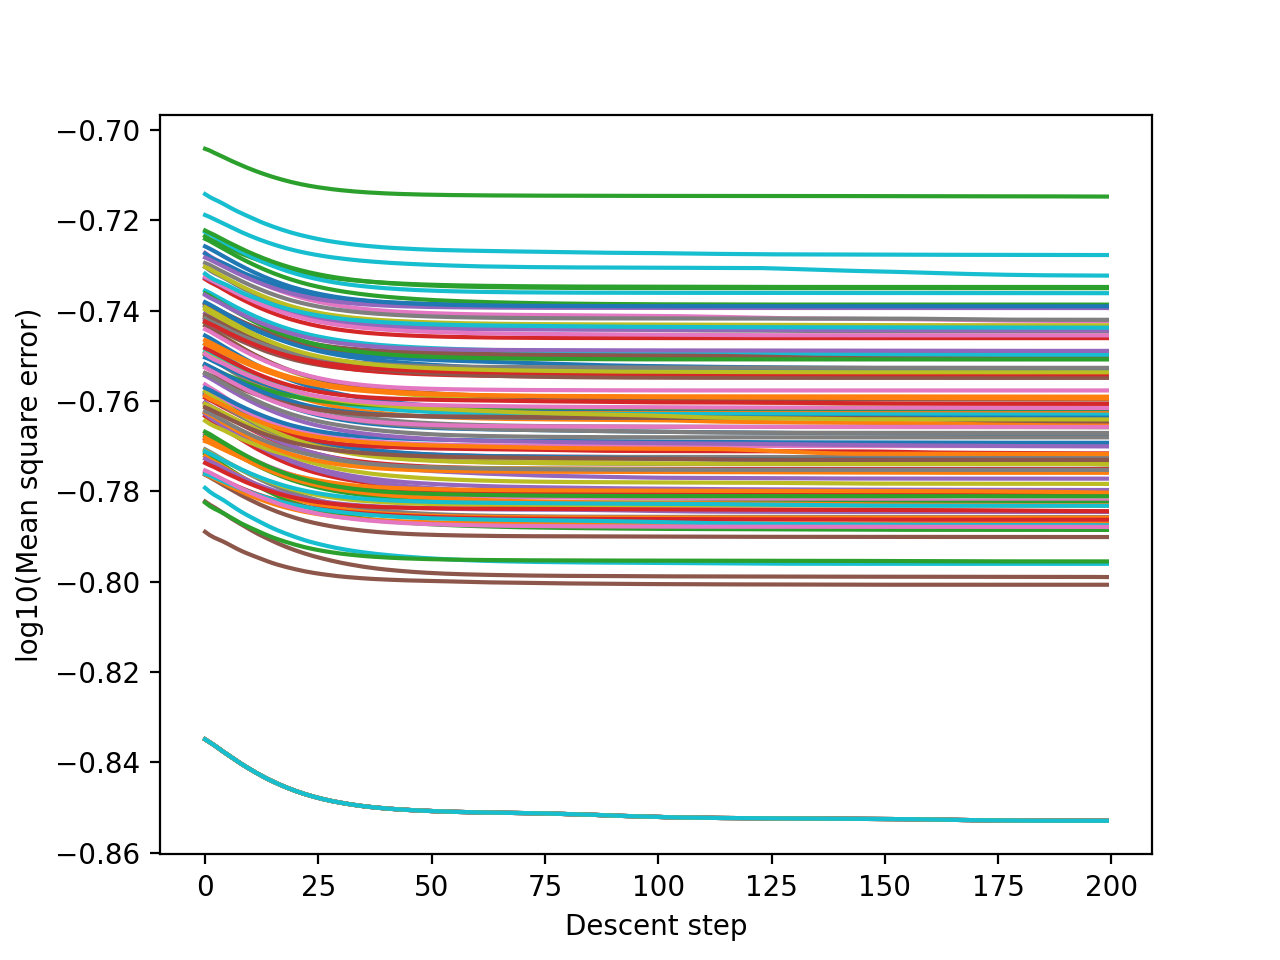

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [34]:
iq_n2.plot_losses(log=True)

<IPython.core.display.Javascript object>


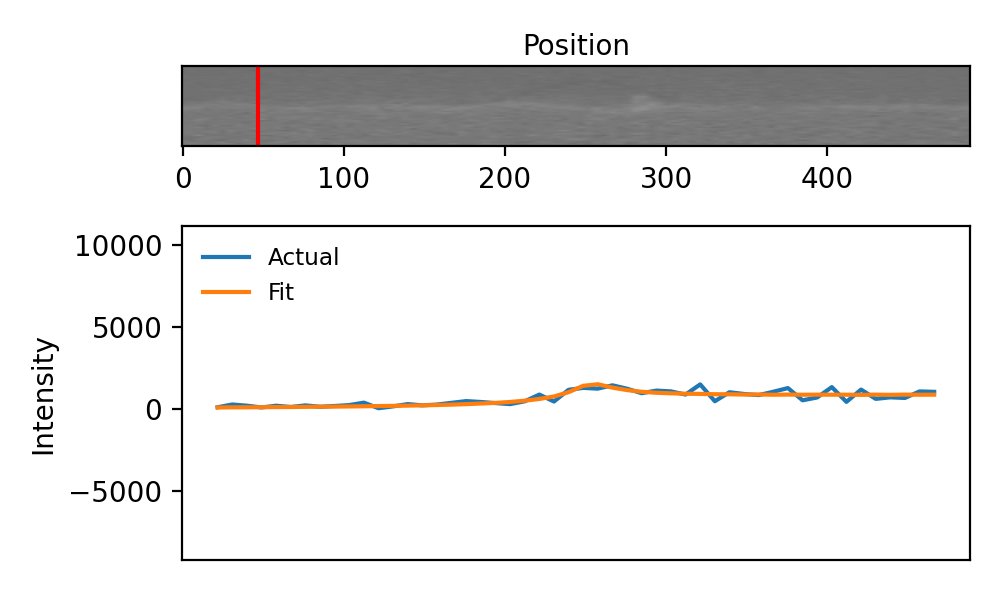

interactive(children=(IntSlider(value=0, description='Frame', max=109), FloatSlider(value=0.1, description='Po…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [35]:
iq3.plot_fits(jupyter=True)

<IPython.core.display.Javascript object>


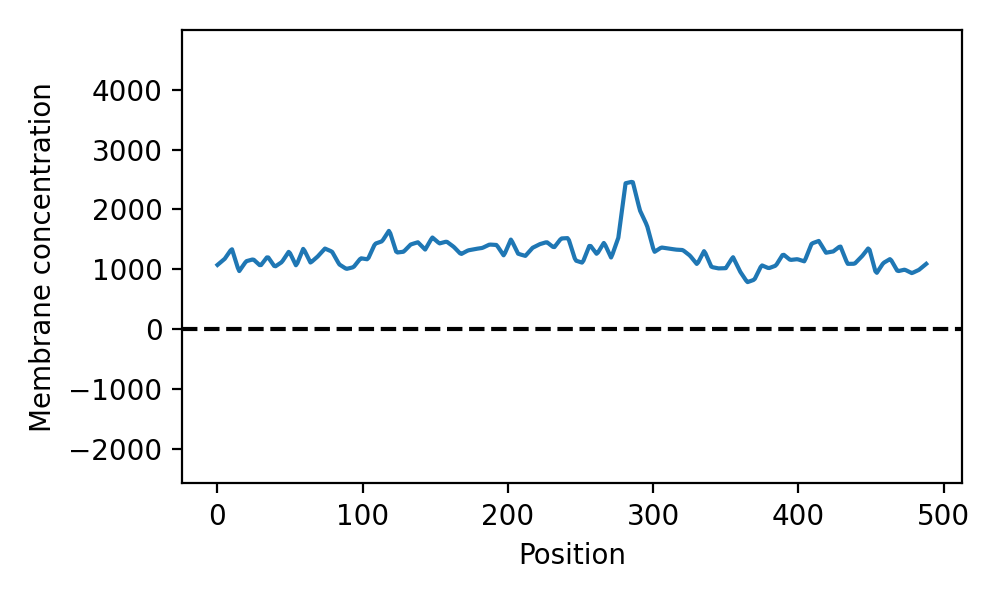

interactive(children=(IntSlider(value=0, description='Frame', max=109), Output()), _dom_classes=('widget-inter…

(<Figure size 500x300 with 1 Axes>,
 <AxesSubplot:xlabel='Position', ylabel='Membrane concentration'>)

In [36]:
iq3.plot_quantification(jupyter=True)

<IPython.core.display.Javascript object>


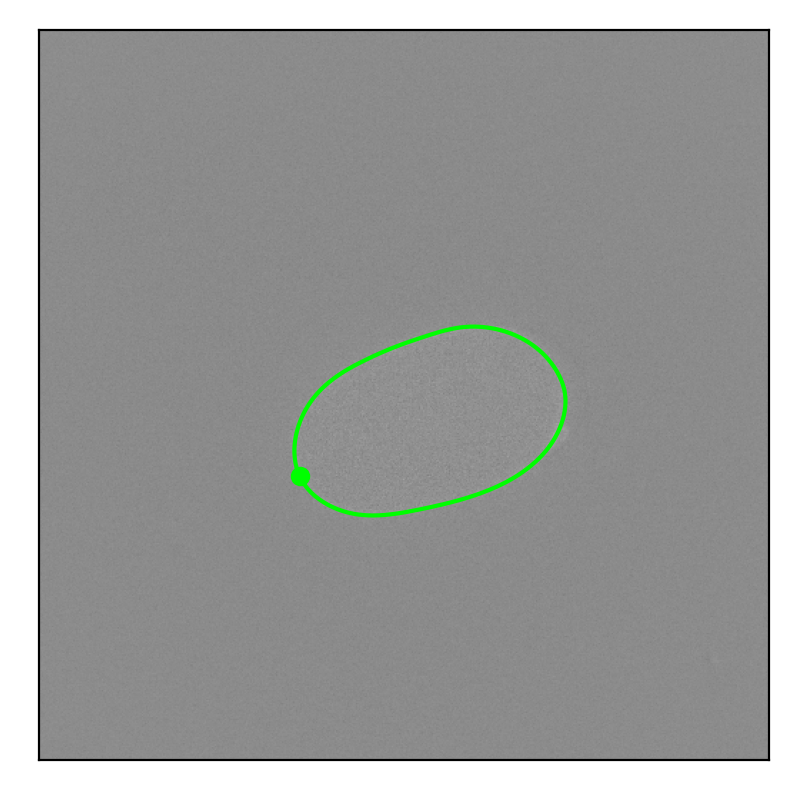

interactive(children=(IntSlider(value=0, description='Frame', max=109), Output()), _dom_classes=('widget-inter…

(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

In [38]:
iq3.plot_segmentation(jupyter=True)

### Save segmentation

In [41]:
[np.savetxt('Segmentations/iq1/%03d.txt' % i, r) for i, r in enumerate(iq1.roi)];
[np.savetxt('Segmentations/iq2/%03d.txt' % i, r) for i, r in enumerate(iq2.roi)];
[np.savetxt('Segmentations/iq3/%03d.txt' % i, r) for i, r in enumerate(iq3.roi)];
[np.savetxt('Segmentations/iq_n2/%03d.txt' % i, r) for i, r in enumerate(iq_n2.roi)];

### Compile res

In [42]:
res1 = iq1.compile_res()
res1.to_csv('res1.csv')
 
res2 = iq2.compile_res()
res2.to_csv('res2.csv')

res3 = iq3.compile_res()
res3.to_csv('res3.csv')

res_n2 = iq_n2.compile_res()
res_n2.to_csv('res_n2.csv')